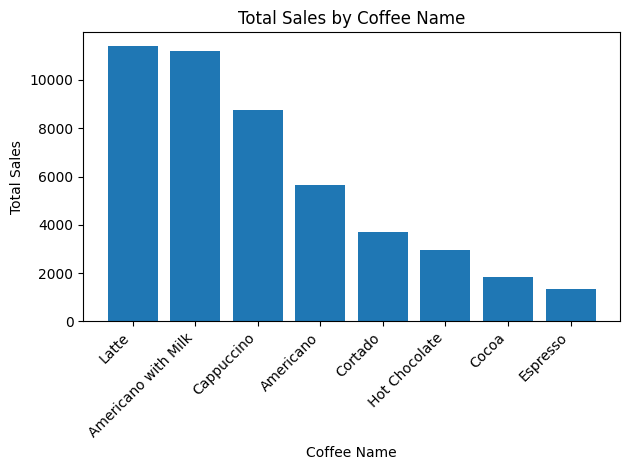

In [1]:
# Plot total sales for each coffee name using SQLite + pandas + matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIG ---
DB_PATH = Path(
    r"C:\Users\elbej\OneDrive\Documents\GitHub\ebejar-portfolio\Data-Analysis\DataAnalytics_Projects\data\coffee_sales.db"
)

# --- CONNECT & QUERY ---
conn = sqlite3.connect(DB_PATH)

query = """
SELECT
    coffee_name,
    ROUND(SUM(money), 2) AS total_sales
FROM coffee_sales
GROUP BY coffee_name
ORDER BY total_sales DESC;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# --- PLOT ---
plt.figure()
plt.bar(df["coffee_name"], df["total_sales"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Coffee Name")
plt.ylabel("Total Sales")
plt.title("Total Sales by Coffee Name")
plt.tight_layout()
plt.show()
